In [1]:
pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import cv2

In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 15393, done.
remote: Total 15393 (delta 0), reused 0 (delta 0), pack-reused 15393
Receiving objects: 100% (15393/15393), 14.29 MiB | 21.68 MiB/s, done.
Resolving deltas: 100% (10529/10529), done.


In [4]:
model=torch.hub.load('ultralytics/yolov5','yolov5s')

/usr/local/lib/python3.9/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: YOLOv5 requirement "gitpython>=3.1.30" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 13.

In [6]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data /content/yolov5/data.yml --weight /content/yolov5s.pt --workers 2

train: weights=/content/yolov5s.pt, cfg=, data=/content/yolov5/data.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-140-g1db9533 Python-3.9.16 torch-2.0.0+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, de

In [7]:
model1=torch.hub.load('ultralytics/yolov5','custom',path='/content/last.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-4-14 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7064065 parameters, 0 gradients
Adding AutoShape... 


In [28]:
img='https://www.foodnetwork.com/content/dam/images/food/fullset/2021/05/10/0/WU0502H_spicy-roasted-chicken-legs-recipe_s4x3.jpg'

In [31]:
img='/content/006637.jpg'

In [32]:
results=model1(img)
results.print()

image 1/1: 426x426 1 egg
Speed: 26.3ms pre-process, 717.3ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)


In [ ]:
results=model(img)
results.print()

image 1/1: 426x426 1 broccoli
Speed: 7.7ms pre-process, 13.2ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)


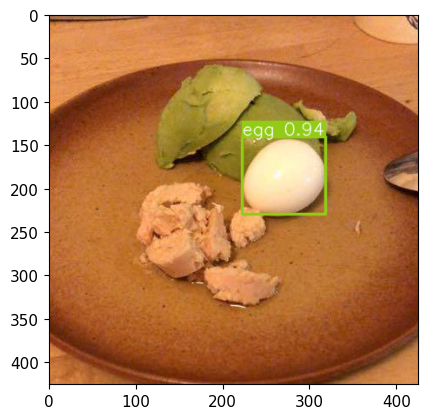

In [33]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()